In [13]:
from utils import GPR, generate_sample, HHKZ
# import kernels
from sklearn.gaussian_process.kernels import ConstantKernel, ExpSineSquared, RBF
import numpy as np
import matplotlib.pyplot as plt

In [14]:
n = 100
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)
X, y = generate_sample(n, 2, [-5, 5], [-5, 5], target_func)

In [17]:
gpr = GPR(kernel=RBF(length_scale=np.ones(2)), n_optim_steps=50) #GPR(kernel=HHKZ(np.ones(2)), n_optim_steps=50)#

In [19]:
gpr.fit(X, y)

2022-08-01 15:17:04,541 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.7}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=2.2e+3
2022-08-01 15:17:05,724 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2202.2380573488144, best pos: [-11.02188202  -2.90442602]


GPR(kernel=RBF(length_scale=[1, 1]), n_optim_steps=50)

In [5]:
fun = gpr.model.log_marginal_likelihood
hist = gpr.optimizer.pos_history

In [6]:
from tqdm import tqdm

In [7]:
# visualize the likelihood for each point in the grid, given by the function fun
n = 10
x_grid = np.linspace(-10, 10, n)
y_grid = np.linspace(-10, 10, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
z = np.asarray([fun(X) for X in tqdm(X_grid)])
z = z.reshape(n, n)


100%|██████████| 100/100 [00:00<00:00, 358.60it/s]


In [8]:
def animate(i):
    ax = plt.axes()
    ax.pcolormesh(x_grid, y_grid, z)
    for pos in hist[i]:
        ax.scatter(pos[0], pos[1], c='gray')
    return ax,

(<AxesSubplot:>,)

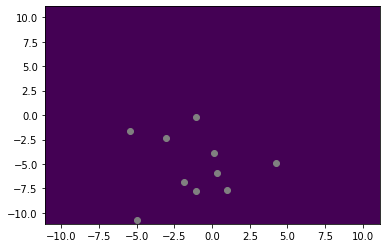

In [9]:
animate(5)

In [10]:
from matplotlib.animation import FuncAnimation 
fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(hist), interval=500)
anim.save("blockbuster.mp4")

2022-08-01 15:15:27,653 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-08-01 15:15:27,657 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y blockbuster.mp4


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026BD713AC10> (for post_execute):


KeyboardInterrupt: 